# CS 7641 HW3 - ybouzekraoui3
# Unsupervised Learning and Dimensionality Reduction

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import timeit

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA , KernelPCA
from sklearn.metrics import silhouette_score, adjusted_rand_score , homogeneity_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection

import scipy
from scipy.linalg import pinv

MinMaxScaler=MinMaxScaler()

In [65]:
data1 = pd.read_csv("archive/data.csv").iloc[:,1:]
true_labels_names = pd.read_csv("archive/labels.csv").iloc[:,1:]

label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(np.array(true_labels_names).reshape(-1))


In [66]:
#Loading data and preprocessing

data2 = pd.read_csv('archive/CC_GENERAL.csv')


data2.drop(['CUST_ID'], axis=1, inplace=True)
data2.dropna(subset=['CREDIT_LIMIT'], inplace=True)
data2['MINIMUM_PAYMENTS'].fillna(data2['MINIMUM_PAYMENTS'].median(), inplace=True)




In [67]:
data3 = pd.read_csv('archive/churn-bigml-80.csv')

true_label_names3 =data3.pop('Churn')
from sklearn.preprocessing import OneHotEncoder
s = (data3.dtypes == 'object')
object_cols = list(s[s].index)


# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data3[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = data3.index


# Remove categorical columns (will replace with one-hot encoding)
num_X = data3.drop(object_cols, axis=1)
# Add one-hot encoded columns to numerical features
data3 = pd.concat([num_X, OH_cols], axis=1)

data3.columns=data3.columns.astype(str)

In [5]:
data3.shape

(2666, 71)

In [6]:

data1 = MinMaxScaler.fit_transform(data1)

In [7]:

data2 = MinMaxScaler.fit_transform(data2)

In [8]:
data3 = MinMaxScaler.fit_transform(data3)

## Clustering

In [17]:
def run_kmeans(data):
    sse_kmeans = []
    silhouette_coefficients_kmeans = []

    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k,random_state=113)
        kmeans.fit(data)
        sse_kmeans.append(kmeans.inertia_)
        if k>1 : silhouette_coefficients_kmeans.append(silhouette_score(data, kmeans.labels_))
    plt.style.use("fivethirtyeight")
    fig, axs = plt.subplots(1,2,figsize=[15,5])
    axs[0].plot(range(1, 11), sse_kmeans)
    axs[0].set(xlabel="Number of Clusters",ylabel="SSE")
    axs[0].set_xticks(np.arange(1, 11))
    axs[1].plot(np.arange(2, 11), silhouette_coefficients_kmeans)
    axs[1].set(xlabel="Number of Clusters",ylabel="Silhouette Coefficient")
    
    plt.show()

def run_em(data):
    silhouette_coefficients_gmm = []
    aic_scores= []
    bic_scores = []
    for k in range(1, 11):
        gmm=GaussianMixture(n_components=k,covariance_type='diag',n_init=1,warm_start=True,random_state=113)
        gmm.fit(data)
        labels=gmm.predict(data)
        if k>1 : silhouette_coefficients_gmm.append(silhouette_score(data, labels))
        aic_scores.append(gmm.aic(data))
        bic_scores.append(gmm.bic(data))   
    plt.style.use("fivethirtyeight")
    fig, axs = plt.subplots(1,2,figsize=[15,5])
    
    axs[0].plot(np.arange(2, 11), silhouette_coefficients_gmm)
    axs[0].set(xlabel="Number of Clusters",ylabel="Silhouette Coefficient")
    


    axs[1].plot(np.arange(1, 11), aic_scores,label="AIC")
    axs[1].plot(np.arange(1, 11), bic_scores,label="BIC")
    axs[1].set(xlabel="Number of Clusters",ylabel="scores")
    axs[1].set_xticks(np.arange(1, 11))
    plt.legend(loc="best")

    
    plt.show()

### K-means

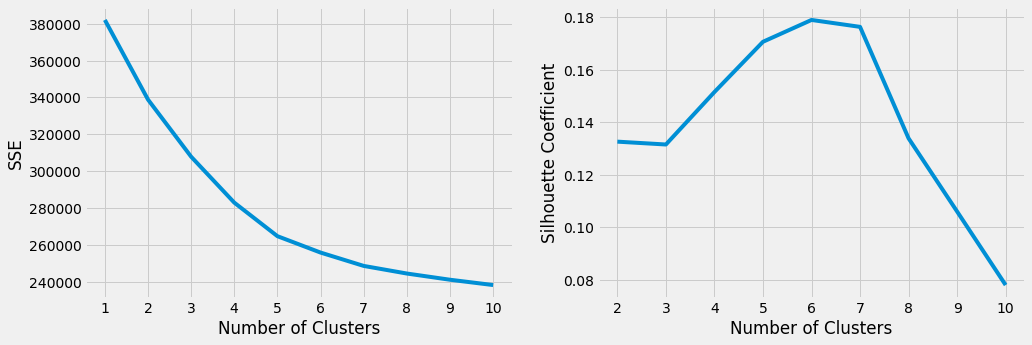

In [18]:
# Dataset 1
run_kmeans(data1)

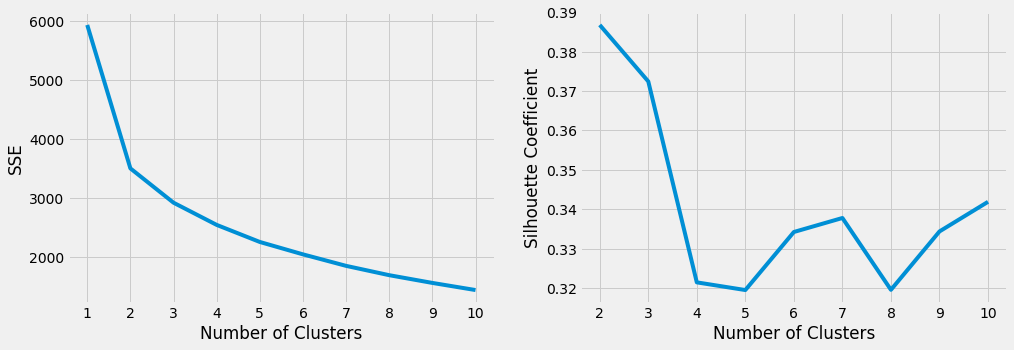

In [19]:
# Dataset 2
run_kmeans(data2)

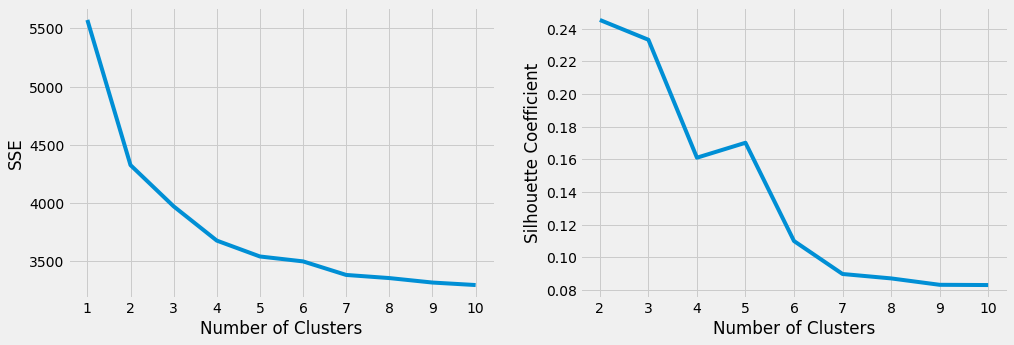

In [20]:
# Dataset 3
run_kmeans(data3)

### Expectation Maximization

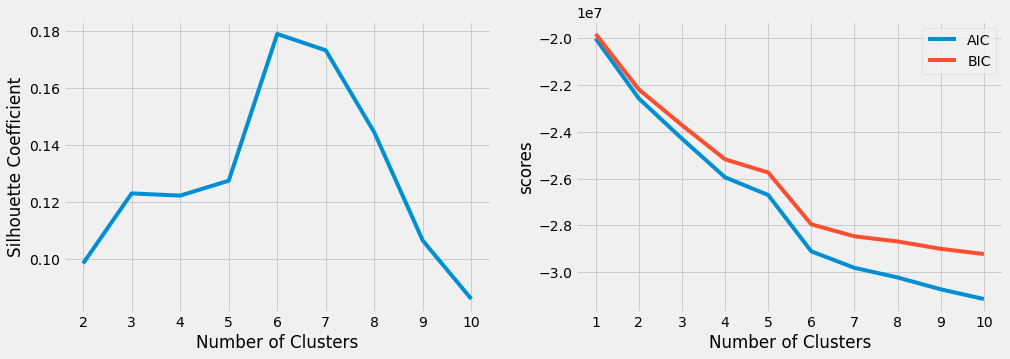

In [21]:
run_em(data1)

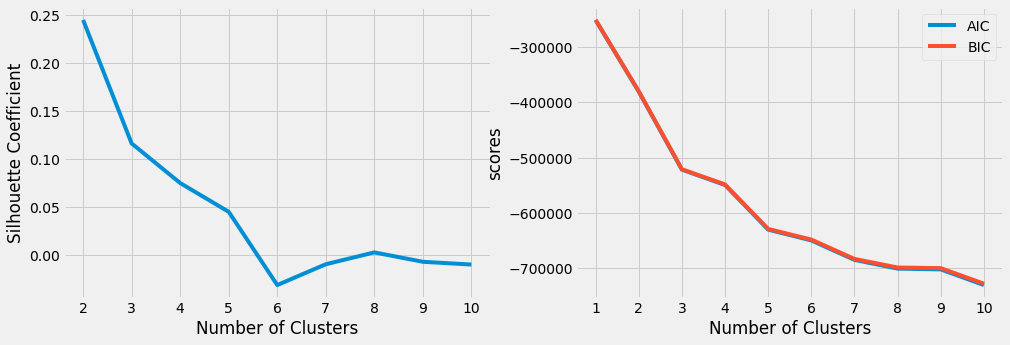

In [22]:
run_em(data2)

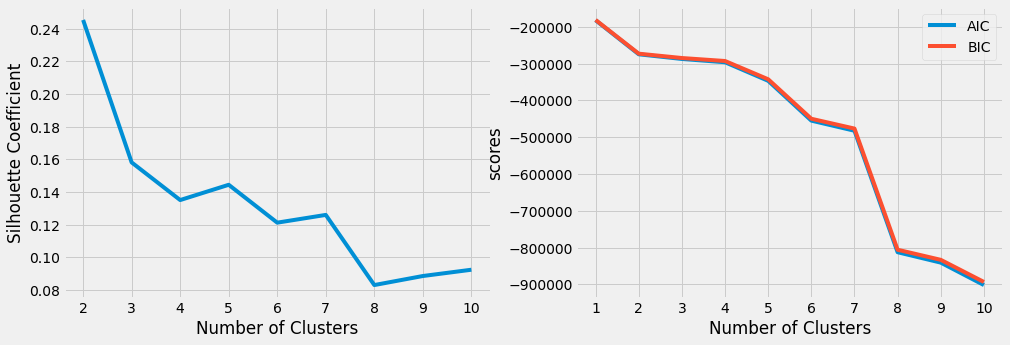

In [23]:
run_em(data3)

## Feature Selection

### PCA

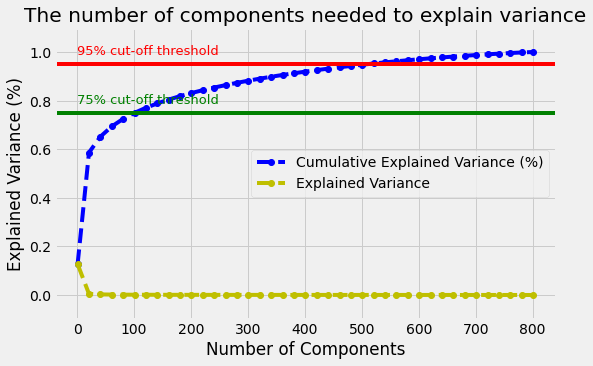

In [24]:
pca = PCA().fit(data1)

# matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[8,5])   
xi = np.arange(1,pca.explained_variance_ratio_.size +1, step=20)
y = np.cumsum(pca.explained_variance_ratio_)[0::20]
y1 = pca.explained_variance_ratio_[0::20]
plt.ylim(-0.1,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b',label='Cumulative Explained Variance (%)')
plt.plot(xi, y1, marker='o', linestyle='--', color='y',label = 'Explained Variance')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, pca.explained_variance_ratio_.size+1, step=100)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Explained Variance (%)')
plt.title('The number of components needed to explain variance')
plt.text(0.1, 0.99, '95% cut-off threshold', color = 'red', fontsize=13)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.1, 0.79, '75% cut-off threshold', color = 'g', fontsize=13)
plt.axhline(y=0.75, color='g', linestyle='-')

plt.legend(loc='best')

ax.grid(True)
plt.show()

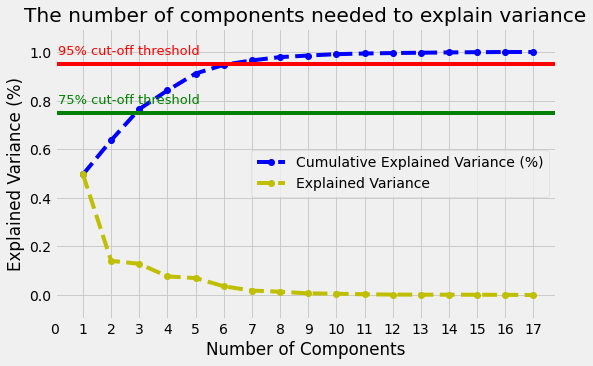

In [25]:
pca = PCA().fit(data2)

# matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[8,5])   
xi = np.arange(1, pca.explained_variance_ratio_.size +1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
y1 = pca.explained_variance_ratio_
plt.ylim(-0.1,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b',label='Cumulative Explained Variance (%)')
plt.plot(xi, y1, marker='o', linestyle='--', color='y',label = 'Explained Variance')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, pca.explained_variance_ratio_.size +1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Explained Variance (%)')
plt.title('The number of components needed to explain variance')
plt.text(0.1, 0.99, '95% cut-off threshold', color = 'red', fontsize=13)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.1, 0.79, '75% cut-off threshold', color = 'g', fontsize=13)
plt.axhline(y=0.75, color='g', linestyle='-')
plt.legend(loc='best')

ax.grid(True)
plt.show()

In [26]:
data2_PCA = PCA(n_components = 3).fit_transform(data2)

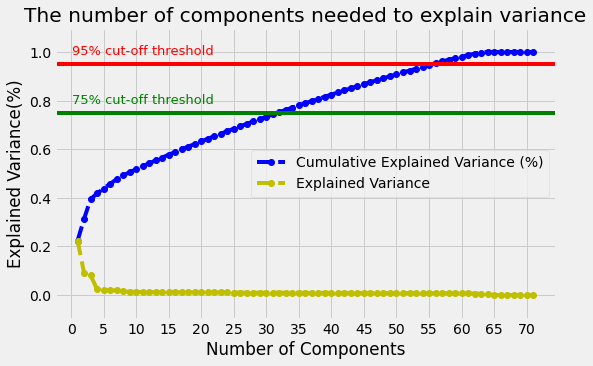

In [27]:
pca = PCA().fit(data3)

# matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[8,5])   
xi = np.arange(1, pca.explained_variance_ratio_.size +1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
y1 = pca.explained_variance_ratio_
plt.ylim(-0.1,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b',label='Cumulative Explained Variance (%)')
plt.plot(xi, y1, marker='o', linestyle='--', color='y',label = 'Explained Variance')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, pca.explained_variance_ratio_.size +1, step=5)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Explained Variance(%)')
plt.title('The number of components needed to explain variance')
plt.text(0.1, 0.99, '95% cut-off threshold', color = 'red', fontsize=13)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.1, 0.79, '75% cut-off threshold', color = 'g', fontsize=13)
plt.axhline(y=0.75, color='g', linestyle='-')

plt.legend(loc='best')
ax.grid(True)
plt.show()

In [28]:
data3_PCA = PCA(n_components = 35).fit_transform(data3)

### ICA

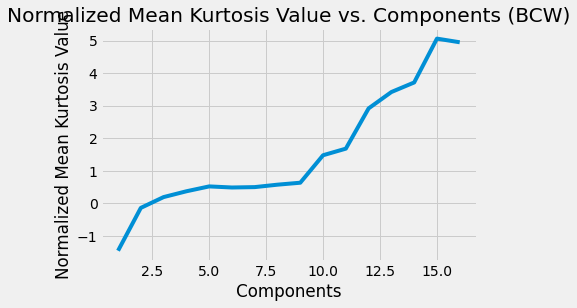

In [29]:
kurtosis_values = []
for i in range(1,data2.shape[1]):
    X_ICA = FastICA(n_components = i).fit_transform(data2)
    kur = scipy.stats.kurtosis(X_ICA)
    kurtosis_values.append(np.mean(kur)/i)
kurtosis_values = np.array(kurtosis_values)
plt.plot(np.arange(1,data2.shape[1]),kurtosis_values)
plt.xlabel('Components')
plt.ylabel('Normalized Mean Kurtosis Value')
plt.grid(True)
plt.title('Normalized Mean Kurtosis Value vs. Components (BCW)')
plt.savefig('bc_ica_kurtosis.png')
plt.show()

In [30]:
data2_ICA = FastICA(n_components = 9).fit_transform(data2)

/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA di

/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA di

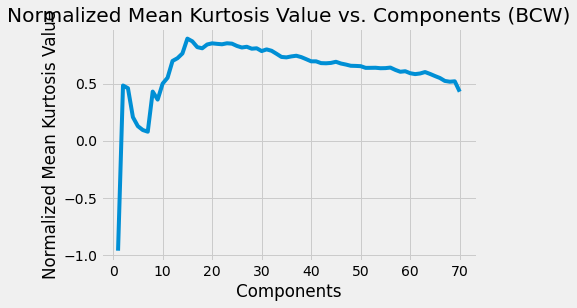

In [31]:
kurtosis_values = []
for i in range(1,data3.shape[1]):
    X_ICA = FastICA(n_components = i).fit_transform(data3)
    kur = scipy.stats.kurtosis(X_ICA)
    kurtosis_values.append(np.mean(kur)/i)
kurtosis_values = np.array(kurtosis_values)
plt.plot(np.arange(1,data3.shape[1]),kurtosis_values)
plt.xlabel('Components')
plt.ylabel('Normalized Mean Kurtosis Value')
plt.grid(True)
plt.title('Normalized Mean Kurtosis Value vs. Components (BCW)')
plt.savefig('bc_ica_kurtosis.png')
plt.show()



In [32]:
np.argmax(kurtosis_values) +1

15

In [33]:
data3_ICA = FastICA(n_components = 15).fit_transform(data3)

/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


### RCA


In [34]:
def run_rca(data):
    reconstruction_error = []
    reconstruction_variance = []
    for i in range(1,data.shape[1]):
        mean_mse = []
        for j in range(0,20):
            rp = GaussianRandomProjection(n_components=i)
            X_RP = rp.fit(data)
            w = X_RP.components_
            p = pinv(w)
            reconstructed = ((p@w)@(data.T)).T
            mean_mse.append(mean_squared_error(data,reconstructed))
        reconstruction_variance.append(np.std(mean_mse))
        reconstruction_error.append(np.mean(mean_mse))

    reconstruction_error = np.array(reconstruction_error)
    plt.plot(np.arange(1,data.shape[1]),reconstruction_error)
    plt.fill_between(np.arange(1,data.shape[1]),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
    plt.xlabel('Components')
    plt.ylabel('Reconstruction Error for RP')
    plt.title('Reconstruction error vs. Number of Components for RP')
    plt.grid(True)
    plt.savefig('bc_rp_error.png')
    plt.show()


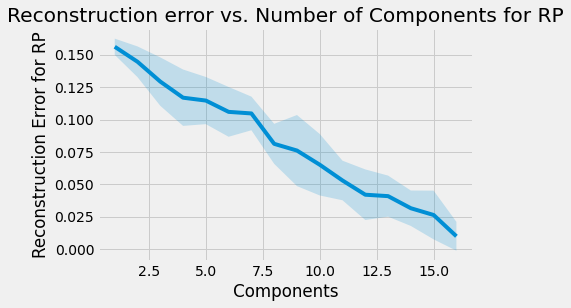

In [35]:
run_rca(data2)

In [36]:
data2_RCA = GaussianRandomProjection(n_components=3).fit_transform(data2)


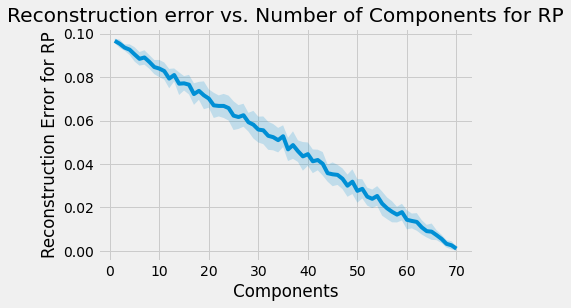

In [37]:
run_rca(data3)

In [38]:
data3_RCA = GaussianRandomProjection(n_components=35).fit_transform(data3)

### Sparse PCA

In [40]:
from sklearn.decomposition import SparsePCA
sparsepca = SparsePCA().fit(data2)



In [41]:
sparsepca.components_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        

In [42]:
sparsepca.n_components_

17

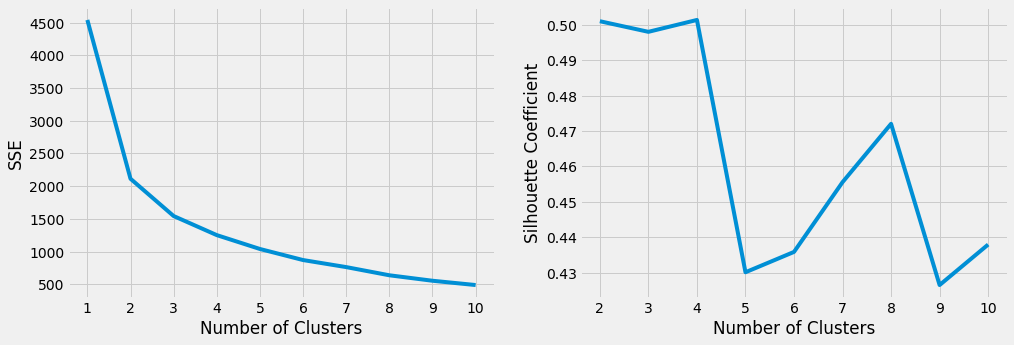

In [43]:
run_kmeans(data2_PCA)

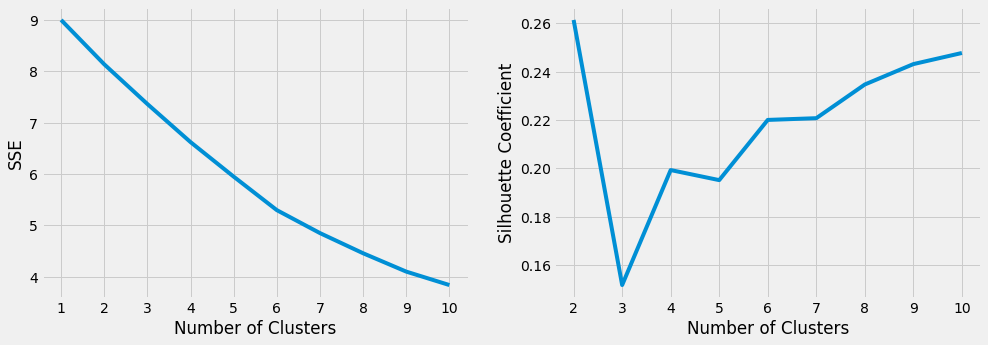

In [44]:
run_kmeans(data2_ICA)

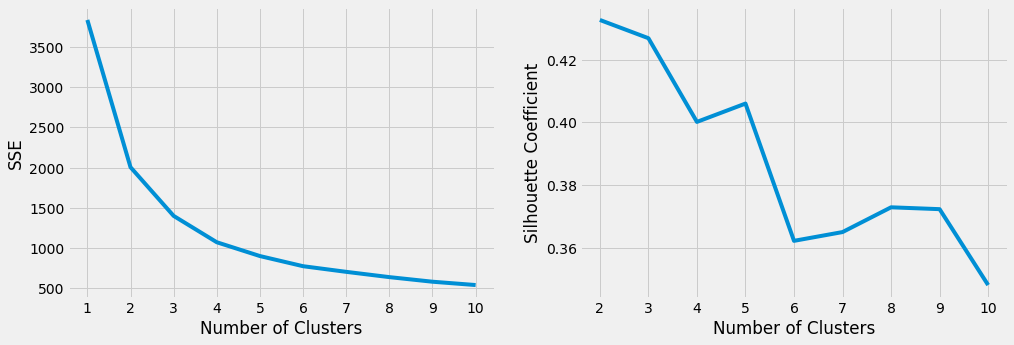

In [45]:
run_kmeans(data2_RCA)

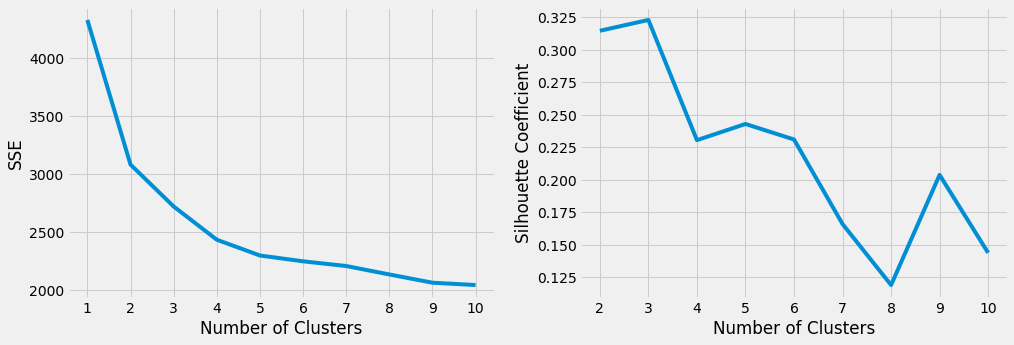

In [46]:
run_kmeans(data3_PCA)

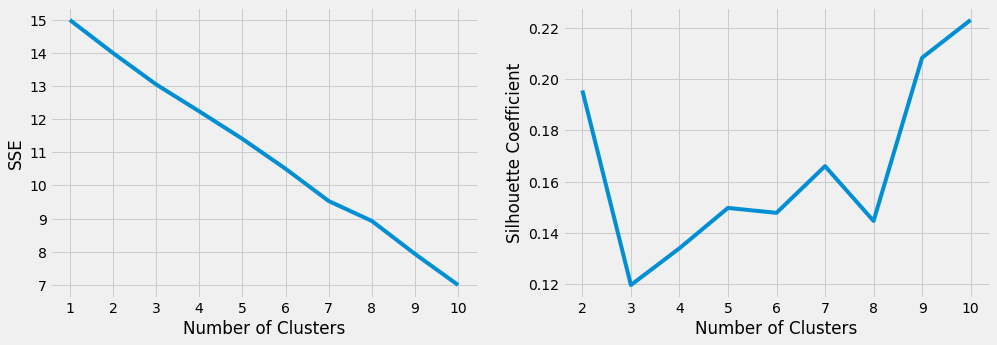

In [47]:
run_kmeans(data3_ICA)

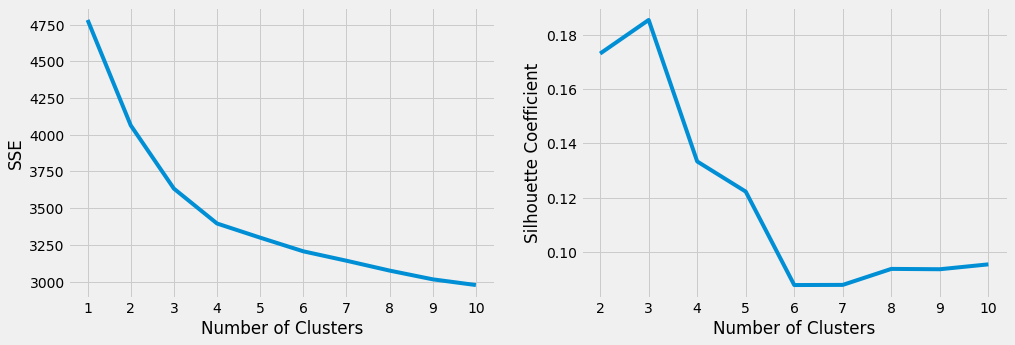

In [48]:
run_kmeans(data3_RCA)

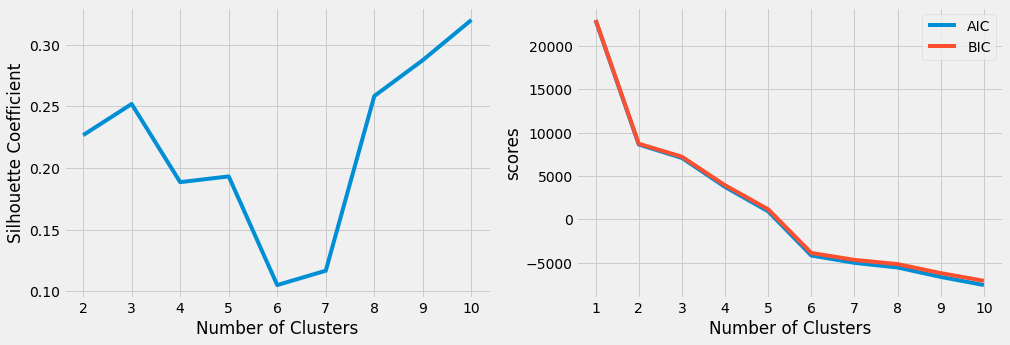

In [49]:
run_em(data2_PCA)

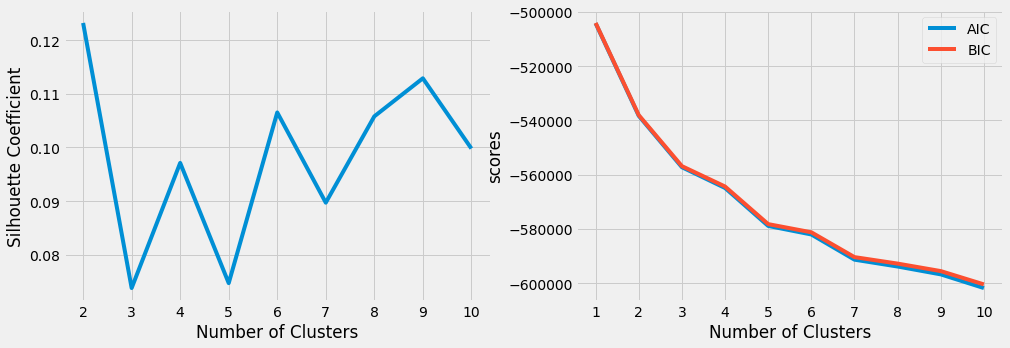

In [50]:
run_em(data2_ICA)

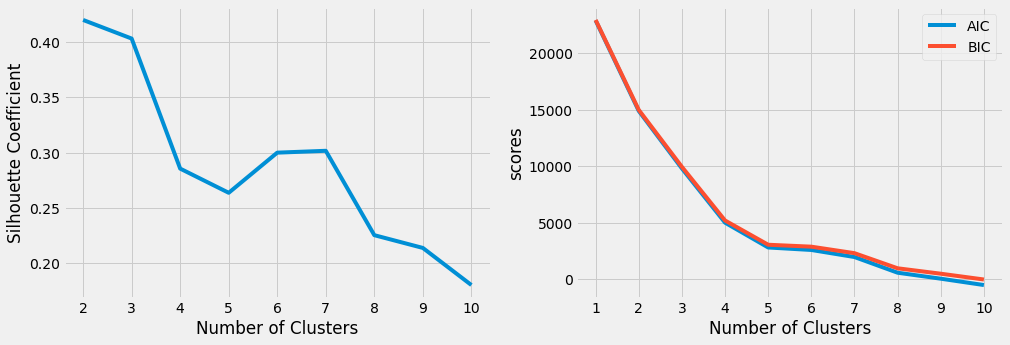

In [51]:
run_em(data2_RCA)

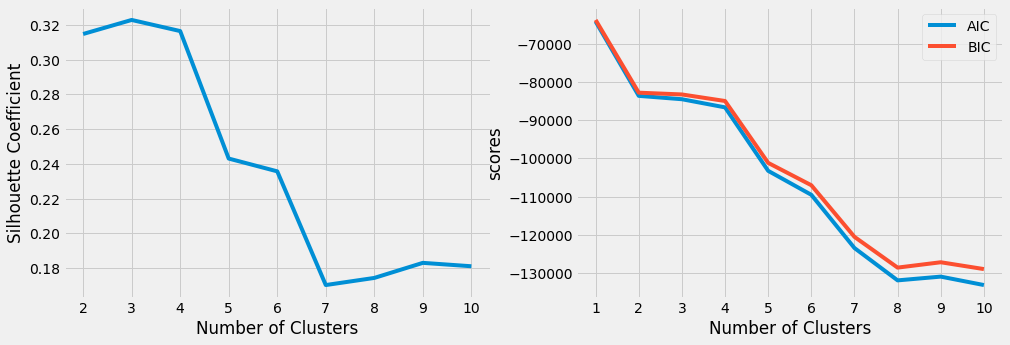

In [52]:
run_em(data3_PCA)

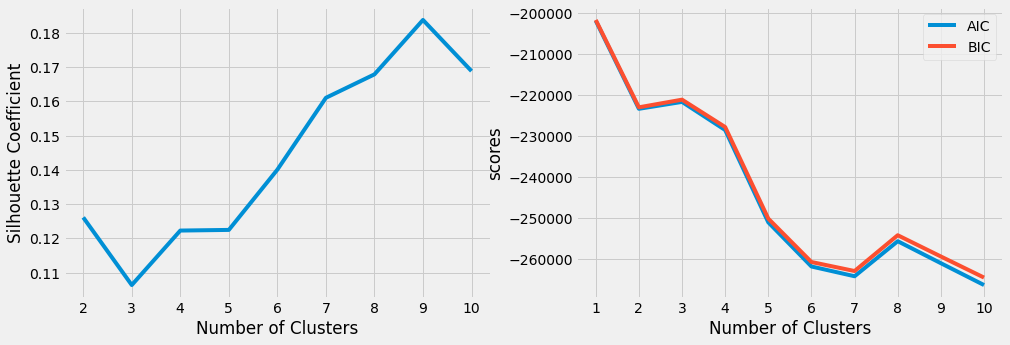

In [53]:
run_em(data3_ICA)

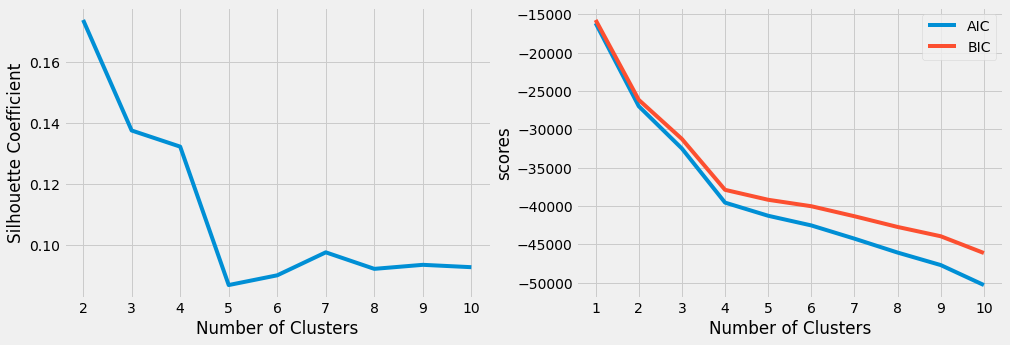

In [54]:
run_em(data3_RCA)

### Neural Network on Churn Dataset after Dimensionality reduction

In [55]:
from sklearn.model_selection import learning_curve
def plot_grid_search(cv_results, name_param):    
    params=[d[name_param] for d in cv_results['params']]
    scores=cv_results['mean_test_score']
    fig = plt.figure()
    plt.plot(params,scores)
    fig.suptitle('Grid Search Scores', fontsize=20)
    plt.xlabel(name_param)
    plt.ylabel('CV Average Score')
    plt.grid('on')
def plot_learning_curve(estimator, X, y,train_sizes=np.linspace(0.01, 1.0, 10)):
        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,cv=5,n_jobs=-1,train_sizes=train_sizes,scoring = make_scorer(accuracy_score),return_times=True)
        fit_times_means = np.mean(fit_times, axis =1)
        print('Fitting time (seconds) =' , fit_times_means[-1])
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        fig = plt.figure()
        plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
        fig.suptitle('Learning curves', fontsize=20)
        plt.xlabel('Training size')
        plt.ylabel('Accuracy')
        plt.legend(loc="best")
        plt.grid('on')



2022-03-28 04:49:47.425175: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-28 04:49:47.425769: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-28 04:49:47.426241: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
2022-03-28 04:49:47.427520: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-28 04:49:47.429121: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

2022-03-28 04:49:54.716551: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-28 04:49:54.717003: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz
2022-03-28 04:49:54.736456: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-28 04:49:54.737085: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz
2022-03-28 04:49:54.761655: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-28 04:49:54.763148: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

Fitting time (seconds) = 3.89026255607605
Cross validation Accuracy: 0.890


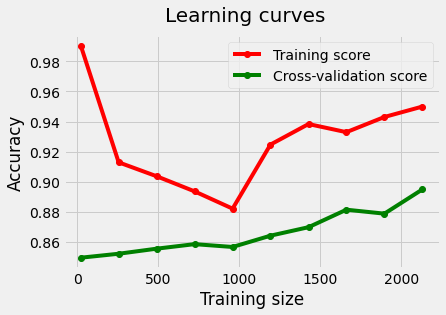

In [56]:
import tensorflow as tf
from keras import models
from keras import layers
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer ,accuracy_score

X_PCA= data3_PCA
y=true_label_names3
input_shape = [X_PCA.shape[1]]

def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu', input_shape=input_shape))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu'))
    
    network.add(layers.Dense(units=64, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='adam', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

Neural_net = KerasClassifier(build_fn=create_network, 
                                 epochs=100, 
                                 batch_size=1000, 
                                 verbose=0)

n_scores = cross_val_score(Neural_net, X_PCA, y, scoring='accuracy', cv=5, n_jobs=-1)

plot_learning_curve(Neural_net, X_PCA, y)
print('Cross validation Accuracy: %.3f' % (np.mean(n_scores)))



/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/home/younes/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", 

Fitting time (seconds) = 0.1922004222869873
Cross validation Accuracy: nan


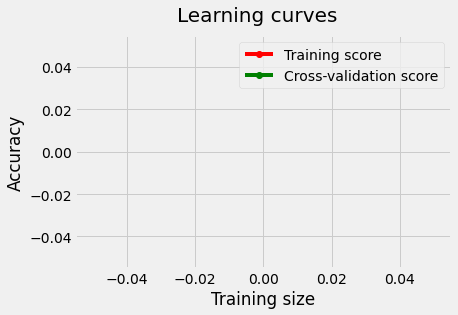

In [57]:
input_shape = [X_ICA.shape[1]]

def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu', input_shape=input_shape))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu'))
    
    network.add(layers.Dense(units=64, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='adam', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

Neural_net = KerasClassifier(build_fn=create_network, 
                                 epochs=100, 
                                 batch_size=1000, 
                                 verbose=0)
X_ICA=data3_ICA
n_scores = cross_val_score(Neural_net, X_ICA, y, scoring='accuracy', cv=5, n_jobs=-1)

plot_learning_curve(Neural_net, X_ICA, y)
print('Cross validation Accuracy: %.3f' % (np.mean(n_scores)))

### Neural Network on Churn Dataset after Clustering

In [58]:

kmeans= KMeans(n_clusters=2,random_state=113)
X_pca_kmeans= np.append(X_PCA, kmeans.fit_transform(X_PCA), 1)

In [59]:
X_pca_kmeans.shape

(2666, 37)

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

Fitting time (seconds) = 4.1637492179870605
Cross validation Accuracy: 0.890


/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


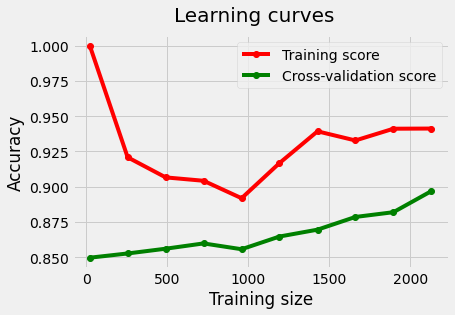

In [60]:
input_shape = [X_pca_kmeans.shape[1]]

def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu', input_shape=input_shape))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu'))
    
    network.add(layers.Dense(units=64, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='adam', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

Neural_net = KerasClassifier(build_fn=create_network, 
                                 epochs=100, 
                                 batch_size=1000, 
                                 verbose=0)

n_scores = cross_val_score(Neural_net, X_pca_kmeans, y, scoring='accuracy', cv=5, n_jobs=-1)

plot_learning_curve(Neural_net, X_pca_kmeans, y)
print('Cross validation Accuracy: %.3f' % (np.mean(n_scores)))

In [61]:
gmm=GaussianMixture(n_components=2,covariance_type='diag',n_init=1,warm_start=True,random_state=113)
gmm.fit(X_PCA)

X_pca_gmm= np.append(X_PCA, gmm.predict(X_PCA).reshape(-1,1), 1)

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/younes/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classific

Fitting time (seconds) = 4.701782464981079
Cross validation Accuracy: 0.895


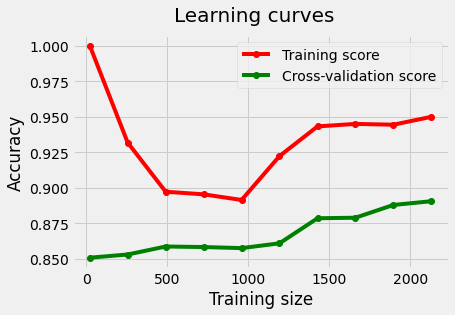

In [62]:
input_shape = [X_pca_gmm.shape[1]]

def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu', input_shape=input_shape))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=64, activation='relu'))
    
    network.add(layers.Dense(units=64, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='adam', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

Neural_net = KerasClassifier(build_fn=create_network, 
                                 epochs=100, 
                                 batch_size=1000, 
                                 verbose=0)

n_scores = cross_val_score(Neural_net, X_pca_gmm, y, scoring='accuracy', cv=5, n_jobs=-1)

plot_learning_curve(Neural_net, X_pca_gmm, y)
print('Cross validation Accuracy: %.3f' % (np.mean(n_scores)))